# Ejercicio 1

<div style="background-color: #54c7ec; color: #fff; font-weight: 700; padding-left: 10px; padding-top: 5px; padding-bottom: 5px"><strong>Ejercicio 1:Definición de una MLP con Pytorch</strong></div>

* Define una MLP para el problema MNIST-Fashion con una sola capa oculta de 64 nodos a la salida. Llama a la clase de red `NeuralNetwork` ¿Cuántos nodos de entrada debería tener? 

* La capa final debería ser tal que la red generara una distribución de probabilidad a la salida para ¿cuántas clases diferentes?

* Crea un código para inspeccionar su estructura y parámetros. Comprueba que funciona. Pista: pudes usar `nn.Module.named_parameters()`

* Modifica ese mismo MLP para añadir una capa entre la oculta y la capa de salida que tenga 32 nodos a la entrada y 10 nodos a la salida. Llama a la nueva clase de red `NeuralNetwork2` ¿Qué ocurre con esta capa? ¿Qué cambios sugieres si es que se necesitan? Si para eso necesitas crear una nueva red, llámala `NeuralNetwork3`.

In [26]:
# PUNTO 1 DEL EJERCICIO 1
# Si la red neuronal debe tener al menos una capa oculta, la red mínima que podemos definir
# es la siguiente, teniendo en cuenta que 
# (1) debería tener tantos a la entrada como píxels hay en la figura
# (2) debería tener 10 nodos a la salida pues se usa para clasificar 10 etiquetas a la salida
# Por tanto, quedará
#  
import torch
from torch import nn
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 64),
            nn.ReLU(),
            nn.Linear(64,10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()
#Obsérvese cómo las salidas son valores reales positivos y negativos
model(torch.rand(1, 28, 28))


tensor([[ 0.2087,  0.0921,  0.0317, -0.0277,  0.1003, -0.1882,  0.1627, -0.0274,
          0.0803, -0.1390]], grad_fn=<AddmmBackward0>)

In [27]:
# PUNTO 2 DEL EJERCICIO 1
# Si la capa final debe generar una distribución de probabilidad, 
# debemos añadir una capa softmax a la salida
# Por tanto, quedará
#  
import torch
from torch import nn
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.softmax_relu_stack = nn.Sequential(
            nn.Linear(28*28, 64),
            nn.ReLU(),
            nn.Linear(64,10),
            nn.Softmax()
        )

    def forward(self, x):
        x = self.flatten(x)
        probs = self.softmax_relu_stack(x)
        return probs

model = NeuralNetwork()
#Obsérvese cómo las salidas ahora son probabilidades (valores en [0,1])
model(torch.rand(1, 28, 28))


tensor([[0.1236, 0.0788, 0.0933, 0.1089, 0.1096, 0.1211, 0.0929, 0.0722, 0.1058,
         0.0937]], grad_fn=<SoftmaxBackward0>)

In [28]:
# PUNTO 3 DEL EJERCICIO 1
# Definimos la clase NeuralNetworkSoft y heredamos de la anterior, para añadir el método 
# para describir la estructura de parámetros
# Por tanto, quedará
#  
import torch
from torch import nn
class NeuralNetworkSoft(NeuralNetwork):
    def __init__(self):
        super().__init__()
    
    def describeMe(self):
        for name, param in self.named_parameters():
            print(f"Nombre del parámetro {name} y tamaño {self.get_parameter(name).data.shape}")

model = NeuralNetworkSoft()
model.describeMe()

Nombre del parámetro softmax_relu_stack.0.weight y tamaño torch.Size([64, 784])
Nombre del parámetro softmax_relu_stack.0.bias y tamaño torch.Size([64])
Nombre del parámetro softmax_relu_stack.2.weight y tamaño torch.Size([10, 64])
Nombre del parámetro softmax_relu_stack.2.bias y tamaño torch.Size([10])


In [29]:
#Definimos la red que se nos ha pedido, navegamos por su estructura
#y parece que a priori no hay problema con ella
class NeuralNetwork2(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.softmax_relu_stack = nn.Sequential(
            nn.Linear(28*28, 64),
            nn.ReLU(),
            nn.Linear(32,10),
            nn.ReLU(),
            nn.Linear(64,10),
            nn.Softmax()
        )

    def forward(self, x):
        x = self.flatten(x)
        probs = self.softmax_relu_stack(x)
        return probs
        
    def describeMe(self):
        for name, param in self.named_parameters():
            print(f"Nombre del parámetro {name} y tamaño {self.get_parameter(name).data.shape}")

model2 = NeuralNetwork2()
model2.describeMe()


Nombre del parámetro softmax_relu_stack.0.weight y tamaño torch.Size([64, 784])
Nombre del parámetro softmax_relu_stack.0.bias y tamaño torch.Size([64])
Nombre del parámetro softmax_relu_stack.2.weight y tamaño torch.Size([10, 32])
Nombre del parámetro softmax_relu_stack.2.bias y tamaño torch.Size([10])
Nombre del parámetro softmax_relu_stack.4.weight y tamaño torch.Size([10, 64])
Nombre del parámetro softmax_relu_stack.4.bias y tamaño torch.Size([10])


Sin embargo, si intentáramos usarla para hacer inferencia, nos daría un problema de multiplicación de matrices al usarla entre la primera capa de entrada y la siguiente. Particularmente al intentar multiplicar una matriz de $64\times 64$ y $32\times 10$, son incompatibles pues han de coincidir las columnas de la primera y las filas de la segunda. 


In [30]:
model2(torch.rand(1, 28, 28))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x64 and 32x10)



Por tanto, si queremos una capa oculta que tenga 32 nodos a la entrada y 10 a la salida, debemos cambiar lo que entra a esta capa y lo que recibe de esta capa. Así, la arquitectura resultante podría ser esta

In [ ]:
class NeuralNetwork3(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.softmax_relu_stack = nn.Sequential(
            nn.Linear(28*28, 32),
            nn.ReLU(),
            nn.Linear(32,10),
            nn.ReLU(),
            nn.Linear(10,10),
            nn.Softmax()
        )

    def forward(self, x):
        x = self.flatten(x)
        probs = self.softmax_relu_stack(x)
        return probs

model3 = NeuralNetwork3()
model3(torch.rand(1, 28, 28))

/Users/juanbot/.pyenv/versions/3.10.13/lib/python3.10/site-packages/torch/nn/modules/module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


tensor([[0.0907, 0.1141, 0.1181, 0.1073, 0.1109, 0.0921, 0.0855, 0.0958, 0.0635,
         0.1221]], grad_fn=<SoftmaxBackward0>)

# Ejercicio 2

<div style="background-color: #54c7ec; color: #fff; font-weight: 700; padding-left: 10px; padding-top: 5px; padding-bottom: 5px"><strong>Ejercicio 2: Reproduce el error del ejercicio 1</strong></div>

* Usa el esquema de entrenamiento que hemos aprendido en el tutorial anterior para demostrar, entrenando la red perteneciente a la clase `NeuralNetwork`, con una época, que funciona perfectamente

* Usa ese mismo esquema de entrenamiento con la red de la clase `NeuralNetwork2` y comenta los resultados

Definimos el código básico para cargar los datos, el loop de train, de test, y para invocar todo el proceso. Usamos una época con un modelo de la clase `NeuralNetwork()`

In [ ]:

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        pred = model(X)
        loss = loss_fn(pred, y)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

learning_rate = 1e-2
batch_size = 64
loss_fn = nn.CrossEntropyLoss()
model = NeuralNetwork()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
epochs = 3
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.276365  [   64/60000]
loss: 1.885314  [ 6464/60000]
loss: 1.376965  [12864/60000]
loss: 1.252184  [19264/60000]
loss: 0.992394  [25664/60000]
loss: 0.943998  [32064/60000]
loss: 0.925830  [38464/60000]
loss: 0.793191  [44864/60000]
loss: 0.851068  [51264/60000]
loss: 0.778316  [57664/60000]
Test Error: 
 Accuracy: 72.6%, Avg loss: 0.774015 

Epoch 2
-------------------------------
loss: 0.755183  [   64/60000]
loss: 0.837947  [ 6464/60000]
loss: 0.575345  [12864/60000]
loss: 0.804887  [19264/60000]
loss: 0.687241  [25664/60000]
loss: 0.662620  [32064/60000]
loss: 0.710023  [38464/60000]
loss: 0.656334  [44864/60000]
loss: 0.715188  [51264/60000]
loss: 0.639588  [57664/60000]
Test Error: 
 Accuracy: 78.0%, Avg loss: 0.635224 

Epoch 3
-------------------------------
loss: 0.572842  [   64/60000]
loss: 0.671870  [ 6464/60000]
loss: 0.447697  [12864/60000]
loss: 0.705759  [19264/60000]
loss: 0.595584  [25664/60000]
loss: 0.585101  [32064/600

Ahora, usamos las últimas líneas para trabajar con un modelo de la clase `NeuralNetwork2` y veremos que se genera un error de matrices incompatibles.

In [ ]:
%%capture
model = NeuralNetwork2()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

RuntimeError: mat1 and mat2 shapes cannot be multiplied (64x64 and 32x10)

# Ejercicio 3

<div style="background-color: #54c7ec; color: #fff; font-weight: 700; padding-left: 10px; padding-top: 5px; padding-bottom: 5px"><strong>Ejercicio 3: Representar el aprendizaje</strong></div>

* Cambiar el código anterior para monitorizar la evolución del error de train medio en cada batch y error promedio de test en cada cada batch en lugar de por época. Pruébalo con la arquitectura de NeuralNetwork3

* Representar dicha evolución gráficamente mediante matplotlib

loss: 2.302877  [   64/60000]
Test Error: 
 Accuracy: 11.9%, Avg train loss: 2.302877, Avg test loss: 2.312565 

loss: 2.299443  [ 6464/60000]
Test Error: 
 Accuracy: 12.1%, Avg train loss: 2.299443, Avg test loss: 2.311468 

loss: 2.299209  [12864/60000]
Test Error: 
 Accuracy: 13.6%, Avg train loss: 2.299209, Avg test loss: 2.310421 

loss: 2.298976  [19264/60000]
Test Error: 
 Accuracy: 15.2%, Avg train loss: 2.298976, Avg test loss: 2.309477 

loss: 2.297474  [25664/60000]
Test Error: 
 Accuracy: 16.9%, Avg train loss: 2.297474, Avg test loss: 2.308630 

loss: 2.297805  [32064/60000]
Test Error: 
 Accuracy: 18.7%, Avg train loss: 2.297805, Avg test loss: 2.307806 

loss: 2.297195  [38464/60000]
Test Error: 
 Accuracy: 20.0%, Avg train loss: 2.297195, Avg test loss: 2.306883 

loss: 2.296678  [44864/60000]
Test Error: 
 Accuracy: 20.2%, Avg train loss: 2.296678, Avg test loss: 2.305891 

loss: 2.296314  [51264/60000]
Test Error: 
 Accuracy: 20.0%, Avg train loss: 2.296314, Avg test 

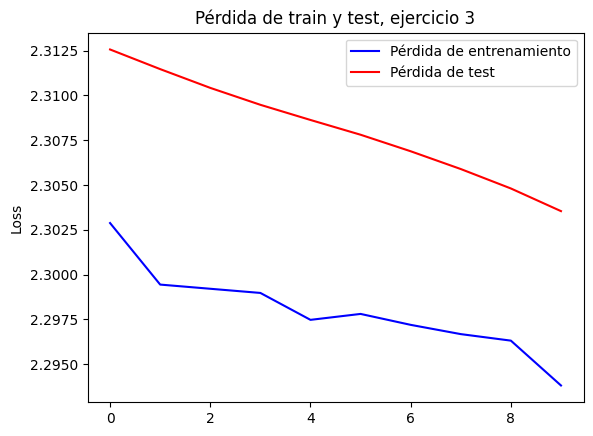

In [ ]:
import matplotlib.pyplot as plt

def train_and_test_loop(traindataloader, testdataloader, model, loss_fn, optimizer):
    size = len(traindataloader.dataset)
    num_batches = len(traindataloader)
    trainloss_values, testloss_values = [], []

    for batch, (X, y) in enumerate(traindataloader):
        pred = model(X)
        loss = loss_fn(pred, y)
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            trainloss_values.append(loss)
            loss = loss.item()
            current = batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            test_loss, correct = 0, 0
    
            for X, y in testdataloader:
                pred = model(X)
                test_loss += loss_fn(pred, y).item()
                correct += (pred.argmax(1) == y).type(torch.float).sum().item()
                
            toreport_test_loss = (size/num_batches) * test_loss / len(testdataloader.dataset)
            toreport_correct = correct / len(testdataloader.dataset)
            testloss_values.append(toreport_test_loss)
            print(f"Test Error: \n Accuracy: {(100*toreport_correct):>0.1f}%, Avg train loss: {loss:>8f}, Avg test loss: {toreport_test_loss:>8f} \n")
    
    return trainloss_values, testloss_values

model = NeuralNetwork3()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
trainloss, testloss = train_and_test_loop(train_dataloader, test_dataloader, model, loss_fn, optimizer)
trainlossdetached = [t.detach().numpy() for t in trainloss]

plt.plot(trainlossdetached, label="Pérdida de entrenamiento", color='blue')
plt.plot(testloss, label="Pérdida de test", color='red')

plt.ylabel('Loss')
plt.title('Pérdida de train y test, ejercicio 3')
plt.legend()
print("Done!")


Como se puede ver, se puede adivinar cierta tendencia decreciente. Sin embargo, solo mirando a la pérdida, no somos capaces de determinar si el modelo después de 7 lotes es útil o no. Por otro lado, es interesante ver que la pérdida en los ejemplos de test, aunque superior a la de training (algo que cabe esperar), muestra la misma tendencia y no está muy lejos de aquella.

# Ejercicio 4

<div style="background-color: #54c7ec; color: #fff; font-weight: 700; padding-left: 10px; padding-top: 5px; padding-bottom: 5px"><strong>Ejercicio 4: Controlar la tasa de aciertos</strong></div>

Una vez que vemos que parece que no hay sobreaprendizaje, vamos a representar además la tasa de aciertos para ver hasta dónde podemos llegar de manera simultánea. Para ello, deberíamos aumentar el número de épochas hasta 10.

¿Qué puedes decir sobre los resultados? ¿Hay algo que falle sobre la representación del experimento? ¿Existen diferencias entre qué conclusiones podrían obtenerse de los resultados del experimento en el ejercicio 3 y este último?


In [ ]:
import numpy as np

def train_and_test_and_accuracy_loop(traindataloader, testdataloader, model, loss_fn, optimizer):
    size = len(traindataloader.dataset)
    num_batches = len(traindataloader)
    num_batches_test = len(testdataloader)
    trainloss_values, testloss_values, accuracy = [], [], []

    # Iteramos sobre lotes de train
    for batch, (X, y) in enumerate(traindataloader):
        #Predecimos
        pred = model(X)
        #Calculamos la pérdida
        loss = loss_fn(pred, y)
        #Calculamos gradientes hacia atrás
        loss.backward()
        #Actualizamos pesos 
        optimizer.step()
        #reseteamos gradientes
        optimizer.zero_grad()

        # ¿Ha llegado el momento de notificar?
        if batch % 100 == 0:
            trainloss_values.append(loss)
            loss = loss.item()
            current = batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            test_loss, correct = 0, 0
    
            for batch, (X, y) in enumerate(testdataloader):
                pred = model(X)
                test_loss += loss_fn(pred, y).item()
                correct += (pred.argmax(1) == y).type(torch.float).sum().item()
                
            toreport_test_loss = (size/num_batches) * test_loss / len(testdataloader.dataset)
            toreport_correct = correct / len(testdataloader.dataset)
            testloss_values.append(toreport_test_loss)
            accuracy.append(100*toreport_correct)
            print(f"Test Error: \n Test Accuracy: {accuracy[-1]:>0.1f}%, Batch train loss: {loss:>8f}, Batch test loss: {toreport_test_loss:>8f} \n")
    
    return trainloss_values, testloss_values, accuracy

model = NeuralNetwork3()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
epochs = 10
trainloss, testloss, accuracy = [], [], []

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    localtrainloss, localtestloss, localaccuracy = train_and_test_and_accuracy_loop(train_dataloader, test_dataloader, model, loss_fn, optimizer)
    toplottrainloss = [t.detach().numpy() for t in localtrainloss]
    trainloss.append(toplottrainloss)
    testloss.append(localtestloss)
    accuracy.append(localaccuracy)

print("Done!")


Epoch 1
-------------------------------
loss: 2.301478  [   64/60000]
Test Error: 
 Test Accuracy: 4.2%, Batch train loss: 2.301478, Batch test loss: 2.311764 

loss: 2.301516  [ 6464/60000]
Test Error: 
 Test Accuracy: 5.9%, Batch train loss: 2.301516, Batch test loss: 2.310988 

loss: 2.299991  [12864/60000]
Test Error: 
 Test Accuracy: 8.6%, Batch train loss: 2.299991, Batch test loss: 2.310232 

loss: 2.298566  [19264/60000]
Test Error: 
 Test Accuracy: 9.3%, Batch train loss: 2.298566, Batch test loss: 2.309514 

loss: 2.298270  [25664/60000]
Test Error: 
 Test Accuracy: 12.3%, Batch train loss: 2.298270, Batch test loss: 2.308753 

loss: 2.297726  [32064/60000]
Test Error: 
 Test Accuracy: 15.3%, Batch train loss: 2.297726, Batch test loss: 2.307976 

loss: 2.299762  [38464/60000]
Test Error: 
 Test Accuracy: 17.2%, Batch train loss: 2.299762, Batch test loss: 2.307100 

loss: 2.296141  [44864/60000]
Test Error: 
 Test Accuracy: 18.2%, Batch train loss: 2.296141, Batch test loss:

Done!


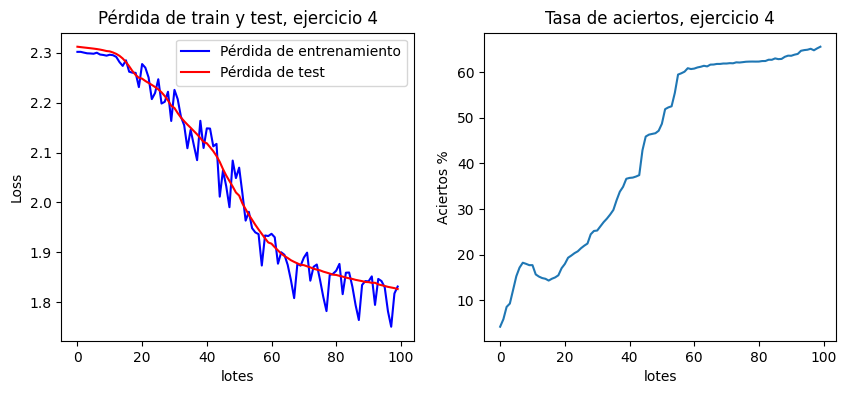

In [ ]:

fig, (myloss, myacc) = plt.subplots(1,2,figsize=(10,4))
myloss.plot(np.concatenate(trainloss), label="Pérdida de entrenamiento", color='blue')
myloss.plot(np.concatenate(testloss), label="Pérdida de test", color='red')
myacc.plot(np.concatenate(accuracy),label="Tasa de aciertos")
myloss.set_xlabel("lotes")
myloss.set_ylabel('Loss')
myloss.set_title('Pérdida de train y test, ejercicio 4')
myloss.legend()
myacc.set_title("Tasa de aciertos, ejercicio 4")
myacc.set_ylabel("Aciertos %")
myacc.set_xlabel("lotes")
print("Done!")


Como vemos, gracias a que hemos añadido más épocas de entrenamiento podemos ver una evolución real en el aprendizaje.
Si antes el sistema estaba cerca de la tasa de aciertos aleatoria que podíamos esperar si el sistema no aprendía, el 10%, cuando lo hemos dejado un tiempo suficiente, hemos visto que es capaz de superar con creces dicha tasa. A partir de los 60 lotes, el sistema parece experimentar un estancamiento en la tasa de aciertos de test.
 